<h1>On Galerkin approximations for the QG equations</h1> 
<h2>Supplementary material for subsection on the Eady model</h2>
<p></p>
</h3>Cesar B. Rocha*</h3>
</h3>, William R. Young, and Ian Grooms </h3>
<p></p>
</h4>Winter 2015 </h4>
<p></p>
*Scripps Institution of Oceanography, University of California, San Diego, 9500 Gilman Dr. MC 0213, La Jolla, CA/USA, <crocha@ucsd.edu>




<h1>The basic state</h1>
<p>Using non-dimensional variables, the basic state for the Eady problem is </p>
\begin{equation}
U(z) = z + 1 \, ,\qquad \text{and} \qquad U'(z) = 1 \, .
\end{equation}

The base state expansion in standard modes is

\begin{equation}
U^G(z) = \sum_{n=0}^{\mathrm{N}} U_n \mathsf{p}_n = \frac{1}{2} + 2\sqrt{2} \sum_{n = 1, n~ \text{odd}}^{\mathrm{N}} \frac{\mathsf{p}_n}{(n\pi)^2}\, .
\end{equation}

Its associated potential vorticity gradient is

\begin{equation}
-[U^G(z)]'' =  2\sqrt{2} \sum_{n = 1, n~ \text{odd}}^{\mathrm{N}} \mathsf{p}_n\, = 2\,\frac{\sin[(N+1)\pi z]}{\sin \pi z} .
\end{equation}

Figure 1 in Rocha, Young and Grooms indents to convey two important points: 

1. While standard modes have zero slope at the boundaries, a modest number of terms provides a reasonable approximation to the exact mean velocity.
2. The potential vorticity associated with this base state is a Dirichlet kernel (a sum of cosines), which is essentially a finite approximation for the two delta functions at the boundaries.

To produce Figure 1, we first create a simple function that evaluates the series

In [8]:
from __future__ import division
from numpy import cos, pi

def eady_base_series(N):
    ''' Galerkin approximatin to Eady's 
            basic state U = z + 1 
        N is the number of baroclinic modes '''
    Ug, Qy = 0.5, 0.
    for n in range(1,N+1,2):
        Ug += 4.*cos(n*pi*z)/(n*pi)**2
        Qy += 4.*cos(n*pi*z)
    return Ug,Qy

We then call this function for various $\mathrm{N}$, and plot it using matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 40, 'legend.handlelength'  : 1.25})

z = np.linspace(-1.,0,300)    
U_exact = z + 1.

N = np.array([1,3,5,7,9,15,27,49])

U_g,Qy_g = np.zeros((z.size,N.size)),np.zeros((z.size,N.size))

for i in range(N.size):
    U_g[:,i],Qy_g[:,i] = eady_base_series(N[i])

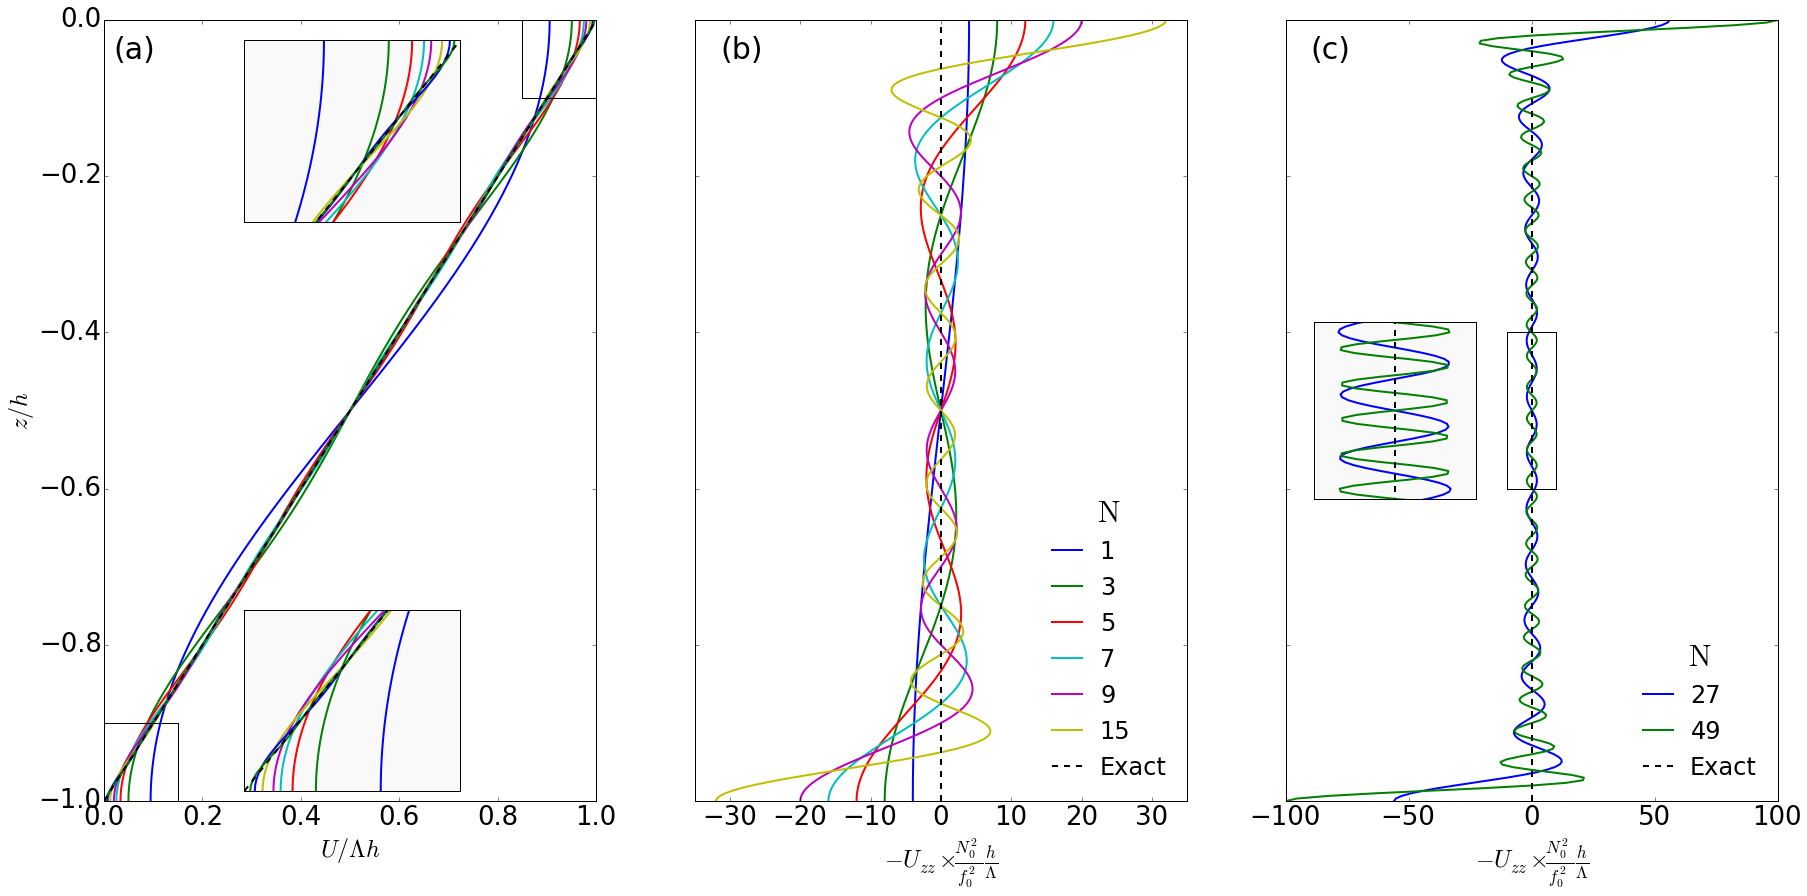

In [6]:
## velocity and PV gradient 
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(30,14))

for i in range(N.size):
    if i < N.size-2:
        ax1.plot(U_g[:,i],z,label=str(N[i]),linewidth=2.)
        ax2.plot(Qy_g[:,i],z,label=str(N[i]),linewidth=2.)   
    elif i == N.size-2:
        ax1.plot(U_g[:,i],z,label=str(N[i]),linewidth=2.,color='b')
        ax3.plot(Qy_g[:,i],z,label=str(N[i]),linewidth=2.,color='b')    
    else:
        ax1.plot(U_g[:,i],z,label=str(N[i]),linewidth=2.,color='g')
        ax3.plot(Qy_g[:,i],z,label=str(N[i]),linewidth=2.,color='g')                

            
ax1.plot(U_exact,z,'--',color='k',linewidth=2.,label='Exact')
ax1.set_xlabel(r'$U/\Lambda h$')
ax1.set_ylabel(r'$z/h$')
ax1.text(.025,-.05, '(a)', size=30, rotation=0.)

# inset
def inset_vel(xl,xr,yl,yu,xil,xir,yiu,yil):
    inset = plt.axes([xil,xir,yiu,yil], axisbg='.975')
    for i in range(N.size):
        if i < N.size-2:
            plt.plot(U_g[:,i],z,linewidth=2.)  
        elif i == N.size-2:
            plt.plot(U_g[:,i],z,linewidth=2.,color='b')
        else:
            plt.plot(U_g[:,i],z,linewidth=2.,color='g')
        
    plt.plot(U_exact,z,'--',color='k',linewidth=2.)
    plt.ylim(yl,yu) 
    plt.xlim(xl,xr)
    plt.setp(inset, xticks=[], yticks=[])

inset_vel(.85,1.0,-.1,0.,.19,.7,.1,.18)
inset_vel(0.,.15,-1.,-.9,.19,.135,.1,.18)
    
## PV gradient
ax2.set_xlabel(r'$-U_{zz} \times \frac{N_0^2}{f_0^2}\frac{h}{\Lambda}$')
ax2.plot(U_exact*0,z,'--',color='k',linewidth=2.,label='Exact')
ax2.legend(loc=4,title= r'$\mathrm{N}$')
ax2.text(-31,-.05,'(b)', size=30, rotation=0.)
ax2.set_xlim(-35,35)

## PV gradient N=27
ax3.plot(U_exact*0,z,'--',color='k',linewidth=2.,label='Exact')
ax3.set_xlabel(r'$-U_{zz} \times \frac{N_0^2}{f_0^2}\frac{h}{\Lambda}$')
ax3.legend(loc=4,title= r'$\mathrm{N}$')
ax3.text(-89,-.05,'(c)', size=30, rotation=0.)

## inset

# mark inset region in bigger axis
ax1.plot([.85,1.],[-.1,-.1],'-',color="k")
ax1.plot([.85,.85],[-.1,0.],'-',color="k")
ax1.plot([.0,.15],[-.9,-.9],'-',color="k")
ax1.plot([.15,.15],[-.9,-1.],'-',color="k")

ax3.plot([-10.,10.],[-.6,-.6],'-',color="k")
ax3.plot([10.,10.],[-.6,-.4],'-',color="k")
ax3.plot([10.,-10.],[-.4,-.4],'-',color="k")
ax3.plot([-10.,-10.],[-.4,-.6],'-',color="k")

def inset_pv(xl,xr,yl,yu,xil,xir,yiu,yil):
    inset = plt.axes([xil,xir,yiu,yil], axisbg='.975')
    for i in range(N.size): 
        if i == N.size-2:
            inset.plot(Qy_g[:,i],z,linewidth=2.,color='b')
        elif i == N.size-1:
            inset.plot(Qy_g[:,i],z,linewidth=2.,color='g')

    plt.plot(U_exact*0,z,'--',color='k',linewidth=2.)
    plt.ylim(yl,yu) 
    plt.xlim(xl,xr)
    plt.setp(inset, xticks=[], yticks=[])
    
inset_pv(-3,3,-.6,-.4,.685,.425,.075,.175)

plt.savefig('figs/U_Qy_exact_galerk.eps')

## Linear stability analysis for Eady problem

Divide and conquer: First we code a couple of simple functions that will be called many times. Most of the functions have similar names/variables to the variables described in Rocha, Young, and Grooms

In [11]:
import numba

def alpha_n(kappa,n):
    ''' the inverse Helmholtz operator in Fourier space '''
    return -1./(kappa**2 + (n*pi)**2)

# nopython=True means an error will be raised
# if fast compilation is not possible.
def sigma12(kappa,Nmax):
    ''' evaluate sigma1 and sigma2
        sums for used in methods B and C 
        Nmax is the number of baroclinic modes '''
    
    i = np.arange(Nmax+1)
    c = alpha_n(kappa,i)
    sigma1 = c[0] + 2.*c[1:].sum()        
    sigma2 = c[0] + 2.*(( (-1.)**i[1:] )*c[1:]).sum()
    
    return sigma1,sigma2

@numba.jit(nopython=True)
def UGpm(Nmax):
    ''' evaluate series for base velocity
        at the boundaries 
        Nmax is the number of baroclinic modes'''

    up,um = .5,.5
    for i in range(1,Nmax+1,2):
        up +=  4./( (i*pi)**2 )
        um += -4./( (i*pi)**2 )

    return up,um

@numba.jit(nopython=True)
def Xi(k,m,n):
    ''' the interaction coefficient 
        Xi for constant stratification '''

    if  ((k==0) and (m==n)): x = 1.
    elif ((m==0) and (k==n)): x = 1.
    elif ((n==0) and (k==m)): x = 1.    
    elif ((k == m+n) or (k == m-n) or (k == n-m)): 
        x = sqrt(2)/2.
    else: x = 0.

    return x

The linear stability analysis reduces to a simple eigenvalue problem in the form

\begin{equation}
\mathsf{M} \, \phi = c \phi\, ,
\end{equation}
where the matrix $\mathsf{M}$ varies from approximation to approximation. In the Eady problem, the matrix $\mathsf{M}$ is $(\mathrm{N}+1)\times(\mathrm{N}+1)$, wheres it is $2\times 2$ in approximations B (exact in this case) and C. Thus, for the Eady problem, we only need to compute the eigenvalues numerically in approximation A. First, we create a function to assemble the matrix $\mathsf{M}$ given the number of baroclinic modes $\mathrm{N}$ and the wavenumber $\kappa$. See Appendix C.



In [10]:
from numpy import cos,sin,pi,sqrt
import scipy as sp
try:
    np.use_fastnumpy = True
except:
    pass
    
import scipy.linalg
import line_profiler

def stability_matrix(kappa,Nmax):
    ''' Linear stability matrix for
        Eady Problem using method A

         ---------------------------------------   
            M phi = c phi, where c
            are the eigenvalues and phi
            the eigenvector         
            
            M is a Nmax+1 by Nmax+1 matrix
            
            Nmax is the number of baroclinic modes
                for the solution
         --------------------------------------  '''


    M1 = np.zeros((Nmax+1,Nmax+1))  
    M2 = np.zeros((Nmax+1,Nmax+1))

    # loop over rows 
    for k in range(Nmax+1):
    
        # M1 
        for m in range(Nmax+1):
            for n in range(1,Nmax+1,2):
                gamma = -2.*sqrt(2)/( kappa**2 + (m*pi)**2 )    
                M1[k,m] += Xi(k,n,m)*gamma

        # M2
        for n in range(Nmax+1):
            for m in np.append(0,range(1,Nmax+1,2)):
                if m == 0:
                    U = 1/2.
                else:    
                    U = 2.*sqrt(2)/( (m*pi)**2 )
                M2[k,n] += Xi(k,n,m)*U

    M = M1 + M2

    return M

Testing efficient of the code

In [71]:
%reload_ext line_profiler

In [72]:
%lprun -s -f stability_matrix -T lp_results.txt stability_matrix(kappa=2.,Nmax=128)


*** Profile printout saved to text file u'lp_results.txt'. 


We then create a simple function to perform the stability analysis, using either method A or C. For method A it calls **stability_matrix**. 

In [9]:
def stability_analysis(kappa,Nmax,method='C',efunc=False):
    '''
     Compute the growth rate of the linear
     stability analysis for the Eady problem 

    --------------------------------------------   
        kappa is the array of wavenumbers
        Nmax is the number of baroclinic modes
            for the solution 
    ---------------------------------------------

    '''
    
    if efunc == True and method == 'C':
        raise 'eigenfunction works only with method A'
    
    try:
        Nkappa = kappa.size
        c = np.zeros(Nkappa,dtype='complex128')
        sig = np.zeros(Nkappa)
        
        if method == 'C':
   
            for i in range(Nkappa):
                sig1,sig2 = sigma12(kappa[i],Nmax)
                up,um = UGpm(Nmax)
                uh = (up+um)/2.
                D =  uh**2  - up*um +\
                        sig1*(up-um) + sig1**2 - sig2**2
                if D<0: cm = uh + 1j*np.sqrt(-D)
                else: cm = uh + np.sqrt(D)              
                c[i],sig[i] = cm,kappa[i]*cm.imag

        elif method == 'A':
            for i in range(Nkappa):
                M = stability_matrix(kappa[i],Nmax)
                cm,em = np.linalg.eig(M)
                imax = cm.imag.argmax()
                c[i],sig[i] = cm[imax],kappa[i]*cm.imag[imax]
                if efunc:
                    efun[:,i] = em[:,imax]
    except AttributeError:
        
        if method == 'C':
            sig1,sig2 = sigma12(kappa,Nmax)
            up,um = UGpm(Nmax)
            uh = (up+um)/2.

            D =  uh**2  - up*um +\
                    sig1*(up-um) + sig1**2 - sig2**2

            if D<0: cm = uh + 1j*np.sqrt(-D)
            else: cm = uh + np.sqrt(D)

            c,sig = cm,kappa*cm.imag

        elif method == 'A':   
            M = stability_matrix(kappa,Nmax)
            cm,em = np.linalg.eig(M)
            imax = cm.imag.argmax()
            c,sig = cm[imax],kappa*cm.imag[imax]
            if efunc:
                efun = em[:,imax]

    if efunc: return c,efun,sig
    else : return c,sig

We now loop compute the eigenvalue for different wanumber $\kappa$ over an array of number of baroclinic modes $\mathrm{N}$ to study the converge of different approximations. (It may take a while to run for a large number of baroclinic modes using approximation A.)

In [ ]:
kappa = np.linspace(0.001,10.,100)
#kappa = 8

# set single number or array of number of baroclinic modes
Nmodes = np.arange(0,25)
#Nmodes = np.arange(0,10)
Nmodes = np.append(Nmodes,2**np.arange(5,8))
#Nmodes = np.array([16,32,64])

c_galerkA,sig_galerkA = np.zeros((Nmodes.size,kappa.size),\
            dtype='complex128'),np.zeros((Nmodes.size,kappa.size))

c_galerkC,sig_galerkC = np.zeros((Nmodes.size,kappa.size),\
            dtype='complex128'),np.zeros((Nmodes.size,kappa.size))

# solve the linear problem
for i in range(Nmodes.size):
    
    c_galerkC[i,:],sig_galerkC[i,:] = stability_analysis(kappa,\
            Nmodes[i],method='C')
    
    #if Nmodes = 0 , A is stable
    if Nmodes[i] == 0:
        c_galerkA[i,:],sig_galerkA[i,:] = 0.,0.5
    else:    
        c_galerkA[i,:],sig_galerkA[i,:] = stability_analysis(kappa,\
                Nmodes[i],method='A',efunc=False)

In [20]:
np.savez('outputs/eady_A.npz',c=c_galerkA,sig=sig_galerkA,\
         kappa=kappa,Nmodes=Nmodes)
np.savez('outputs/eady_C.npz',c=c_galerkC,sig=sig_galerkC,\
         kappa=kappa,Nmodes=Nmodes)

Compute and save single mode with eigenfunction  to plot wave structure

In [13]:
kappa = 8
Nmodes = 64
c_galerkA,efunc_galerk_A,sig_galerkA = stability_analysis(kappa,\
                        Nmodes,method='A',efunc=True)
np.savez('outputs/eady_A_k8_64_efunc.npz',c=c_galerkA,sig=sig_galerkA,\
         efunc=efunc_galerk_A,kappa=kappa,Nmodes=Nmodes)

Method B is exact.

In [16]:
kappa = np.linspace(0.001,10.,100)
kappa_2 = kappa/2. + 0j
c_exact = .5 + np.sqrt( (kappa_2 - np.tanh(kappa_2))\
        *(kappa_2 - 1./np.tanh(kappa_2)) )/kappa
sig_exact = kappa*c_exact.imag

np.savez('outputs/eady_exact.npz',c=c_exact,sig=sig_exact,\
         kappa=kappa)

Now we plot the results to study the convergence of different approximations. 

In [23]:
#import seaborn as sns
#sns.set(style="darkgrid")
#sns.set_context("paper", font_scale=5., rc={"lines.linewidth": 1.5})
#sns.set_style("darkgrid",{'grid_color':.95})

In [4]:
def labels(field='sig',fs=50):
    ''' set labels  in figures '''
    plt.xlabel(r'$\kappa \times\, L_d$',fontsize=fs)
    if field == 'sig':    
        plt.ylabel(r'$\sigma \times \, \frac{\Lambda H}{L}$',fontsize=fs)
    elif field == 'ps':
        plt.ylabel(r'$c_r / \Lambda H$',fontsize=fs)

def plt_exact(field='sig'):
    ''' plot the exact solution '''
    if field == 'sig':
        plt.plot(eady_exact['kappa'],eady_exact['sig'],color="k",\
                linewidth=4.,label='B, Exact')
    elif field == 'ps':
        plt.plot(eady_exact['kappa'],eady_exact['c'].real,color="k",\
                linewidth=4.,label='B, Exact')

In [5]:
path = 'outputs/'
eadyA = np.load(path+'eady_A.npz')
eadyC = np.load(path+'eady_C.npz')
eady_exact = np.load(path+'eady_exact.npz')
Nmodes = eadyA['Nmodes']

In [6]:
lw,aph = 4.,.75
color1,color2 = "#1e90ff","#ff6347"

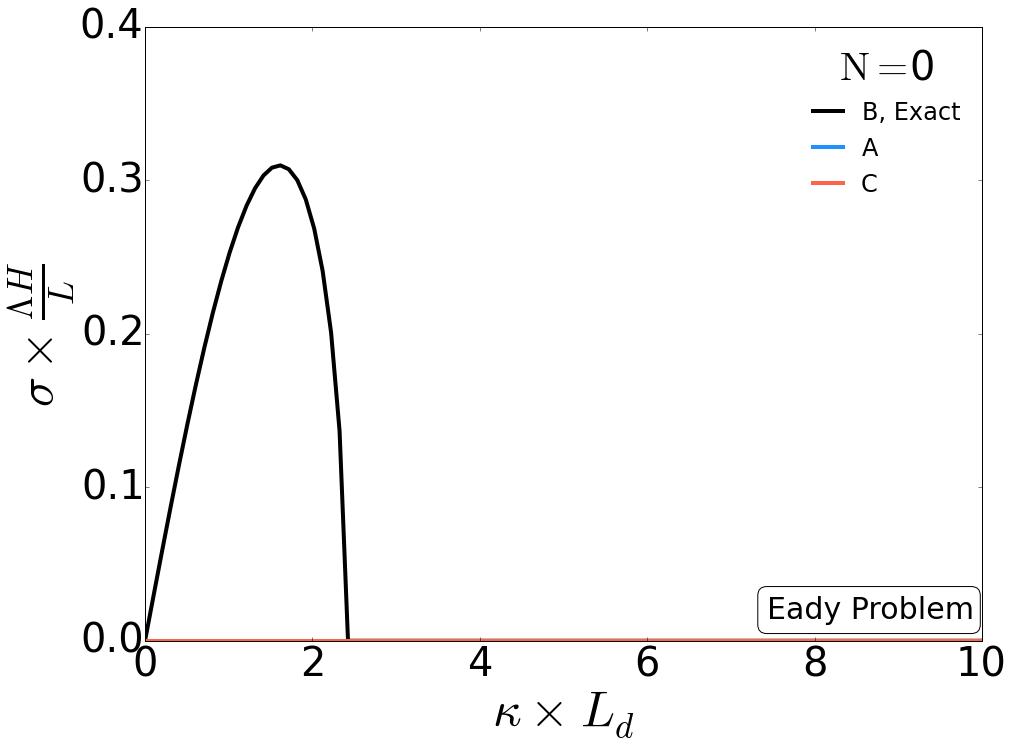

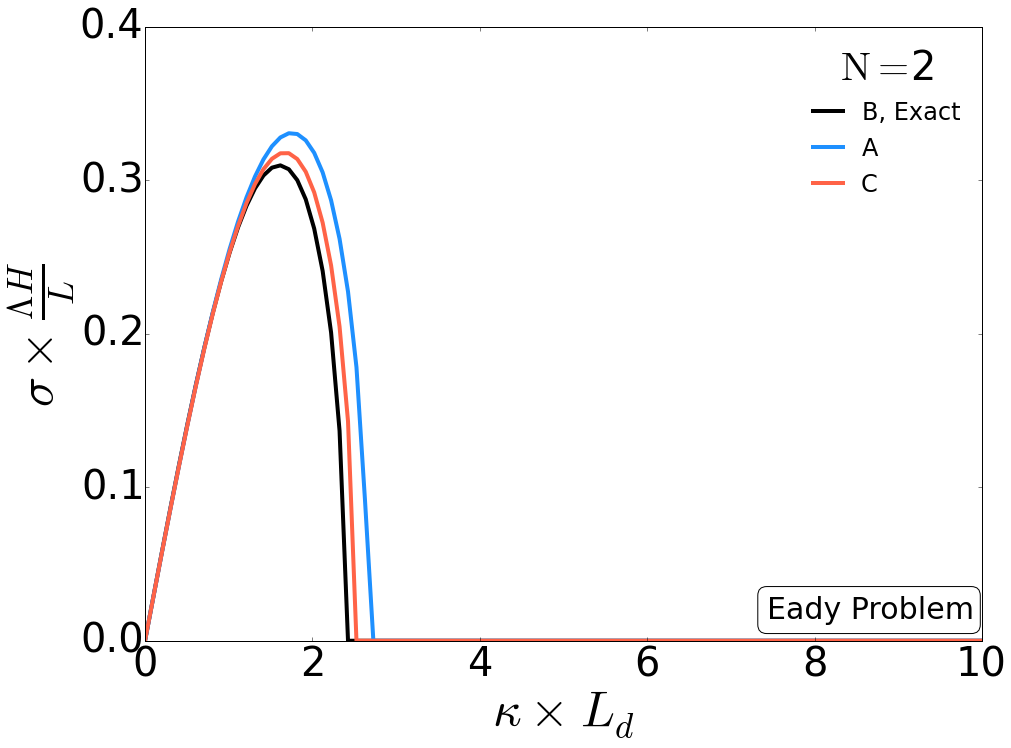

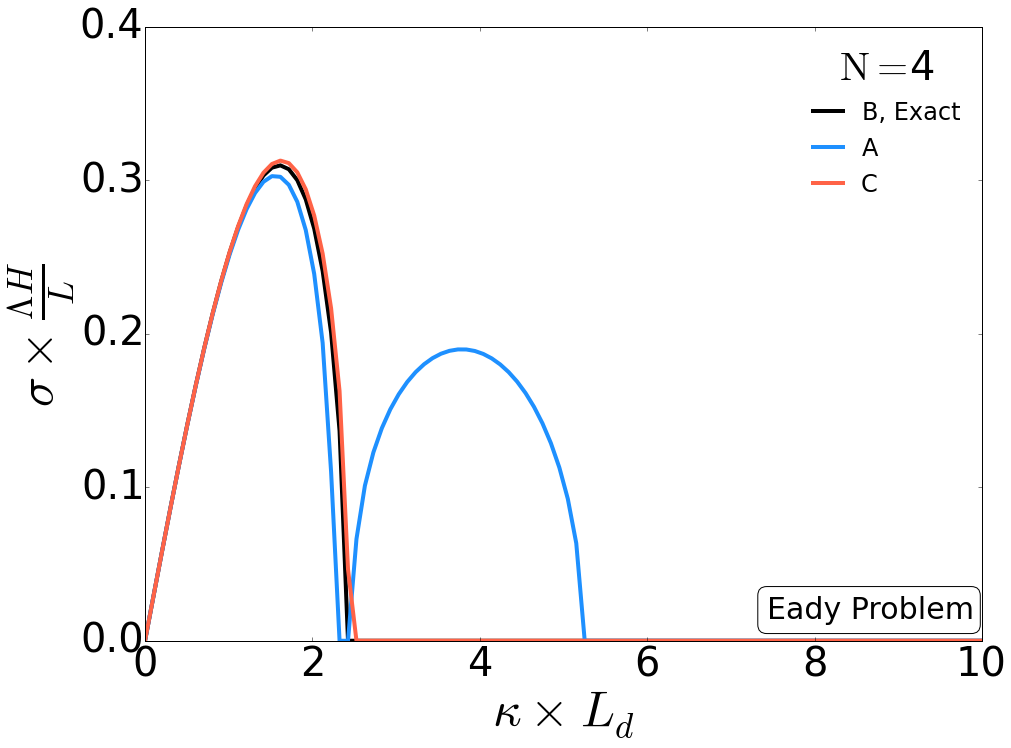

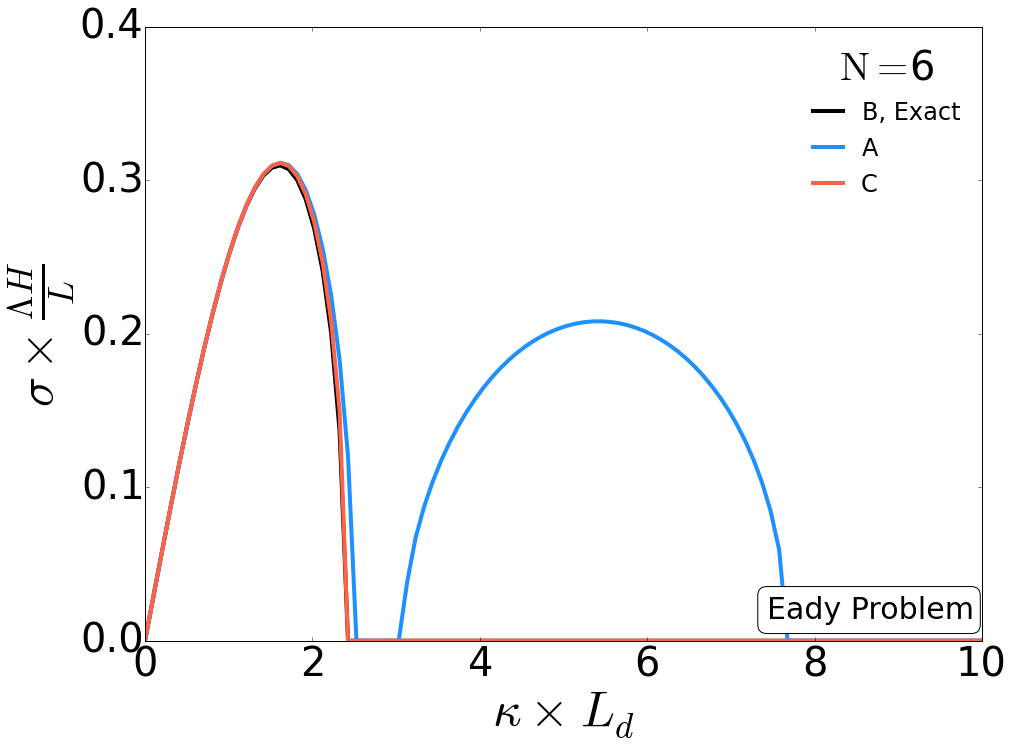

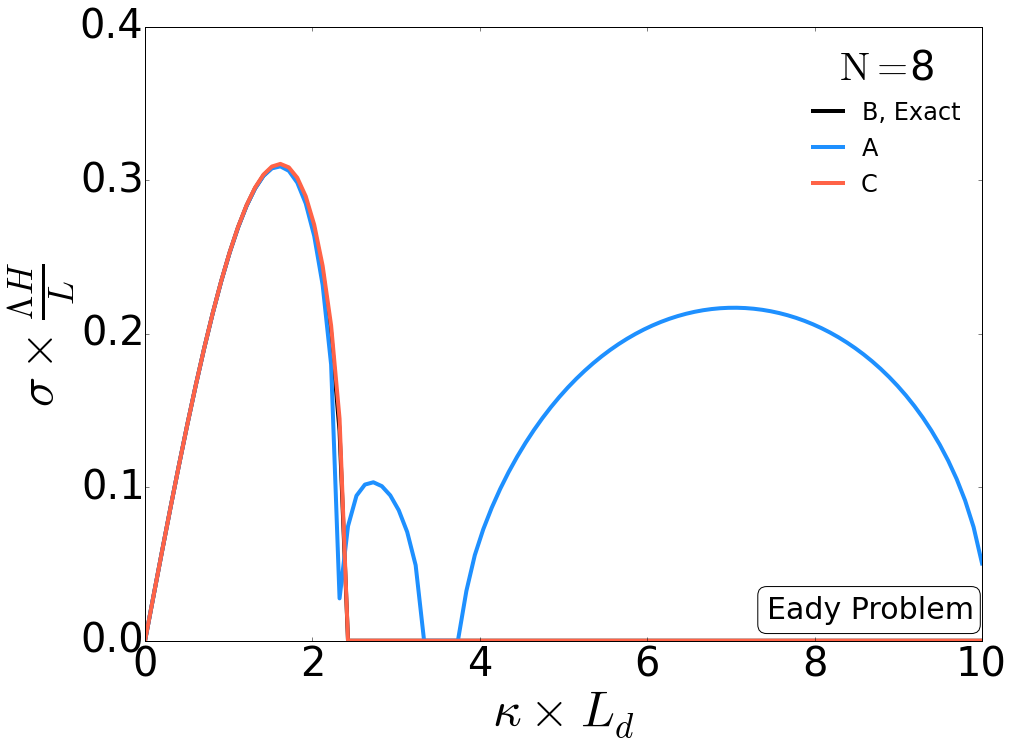

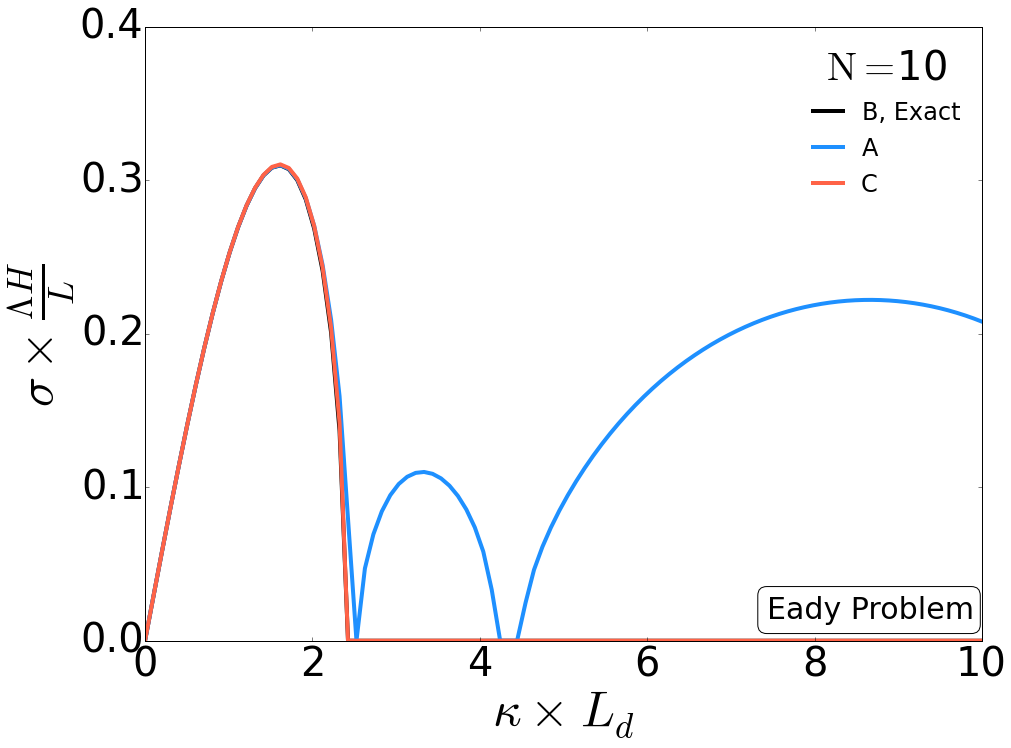

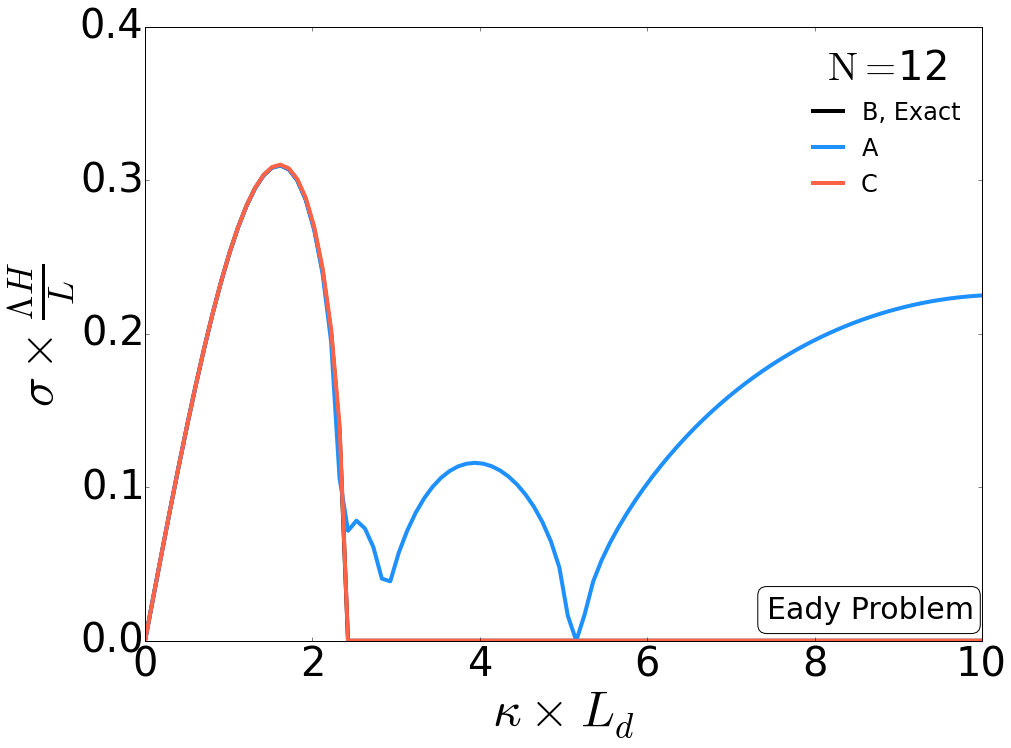

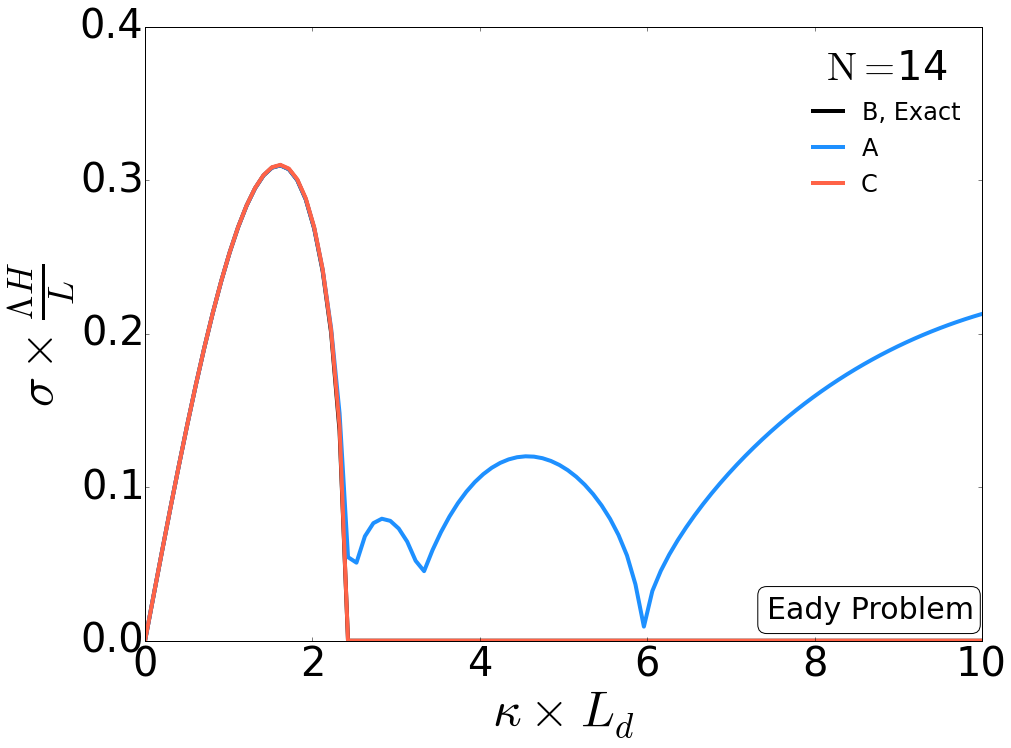

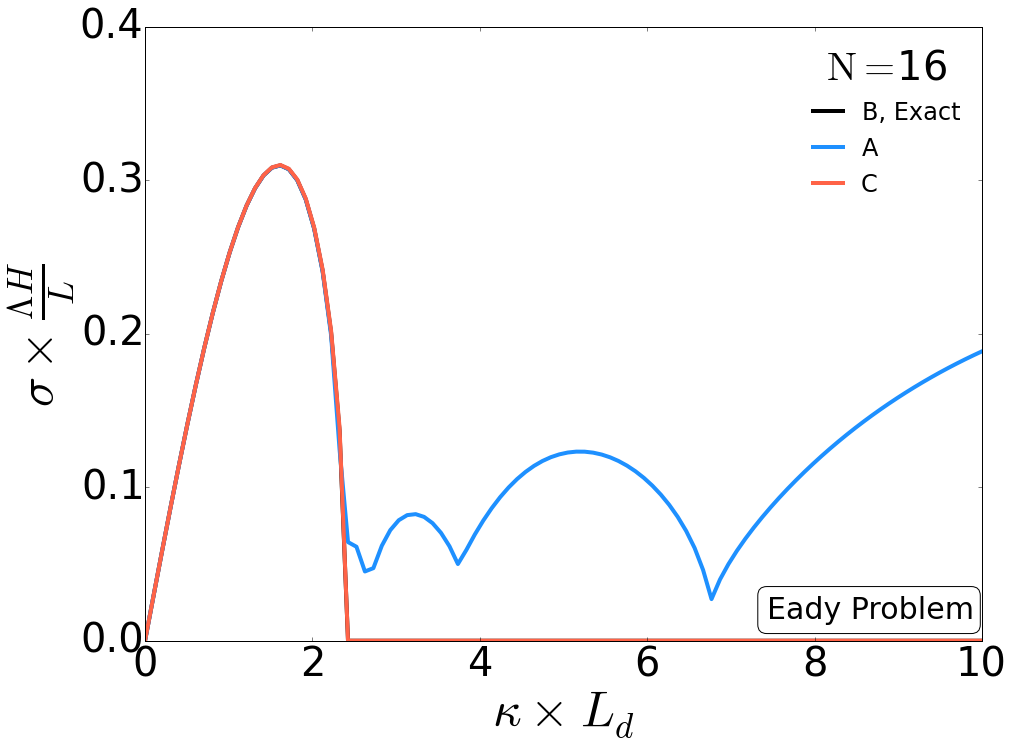

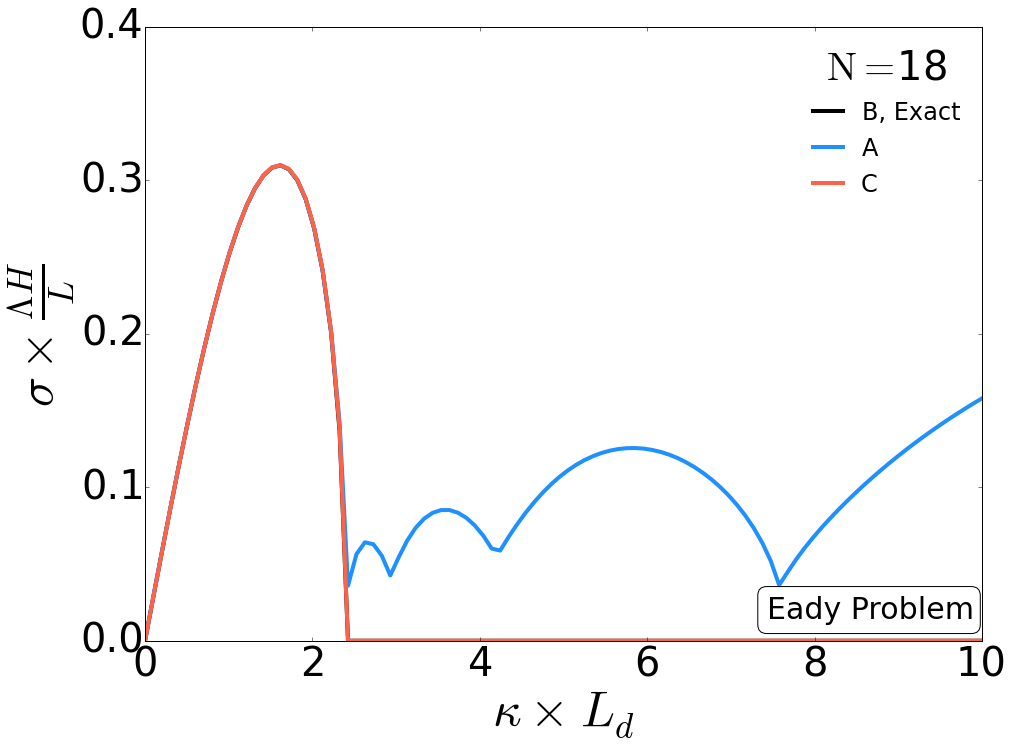

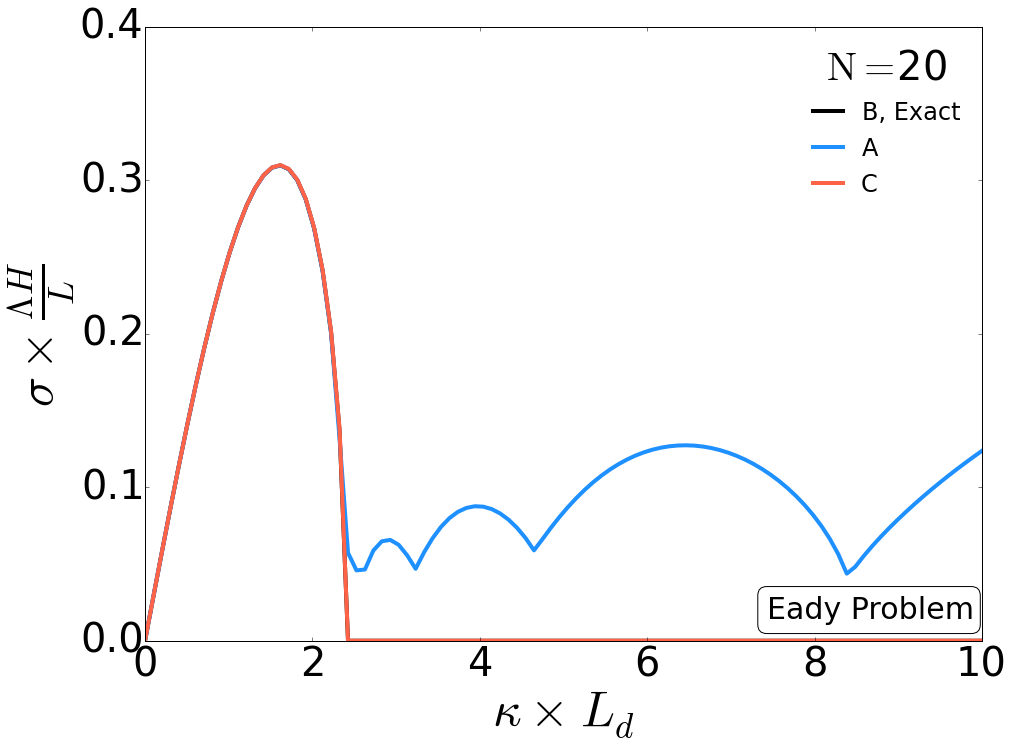

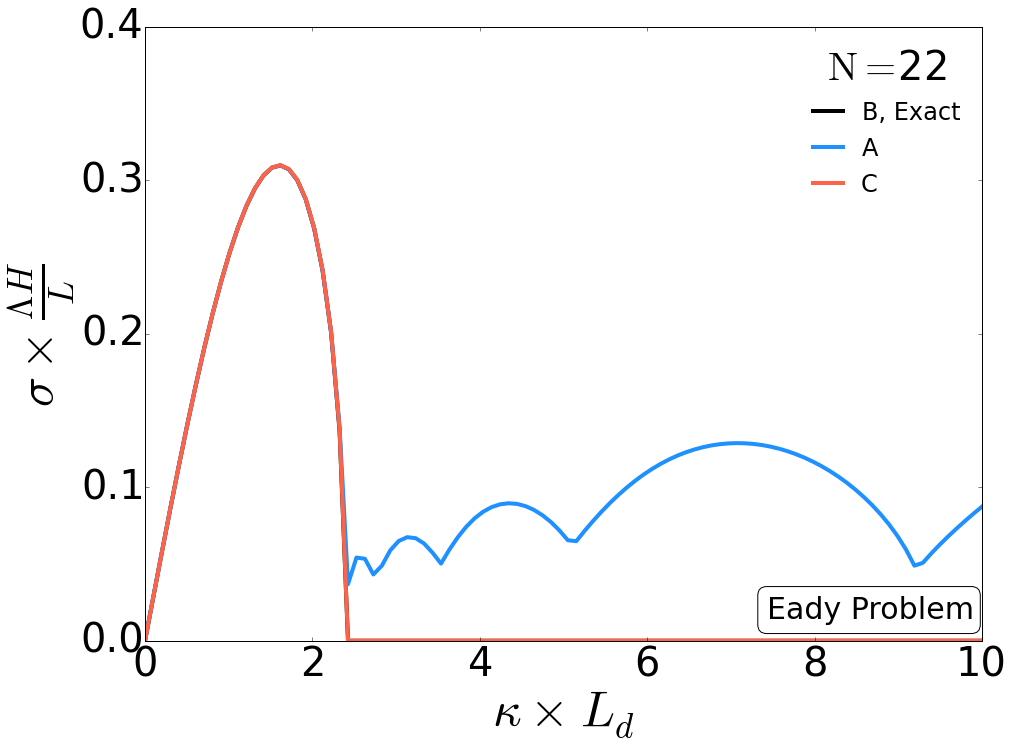

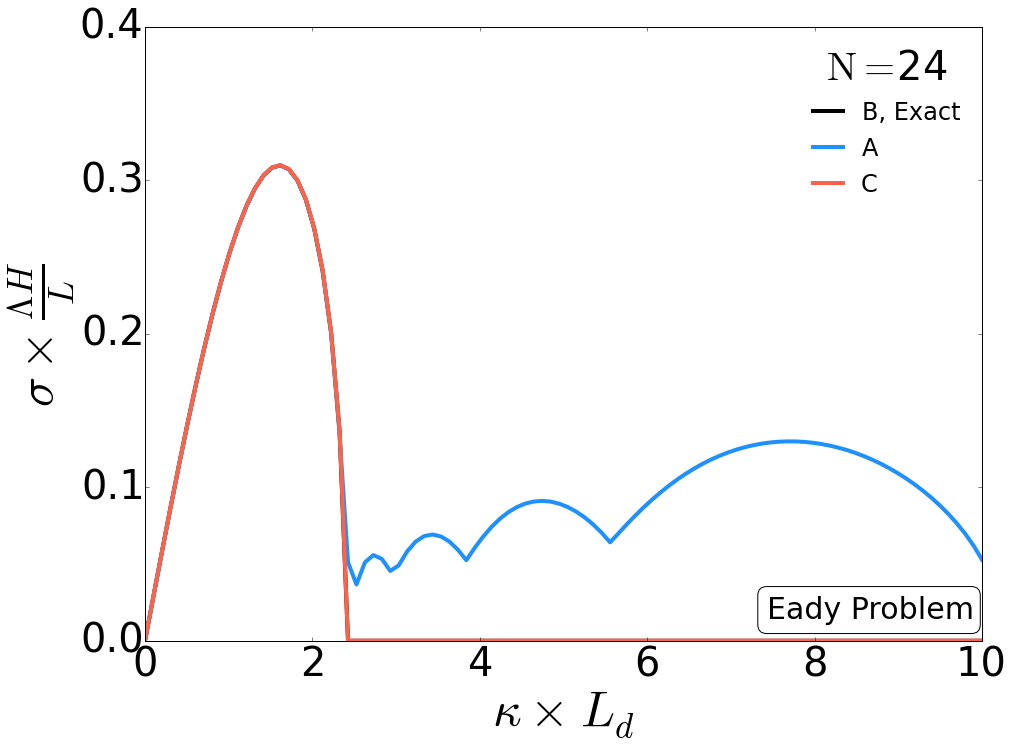

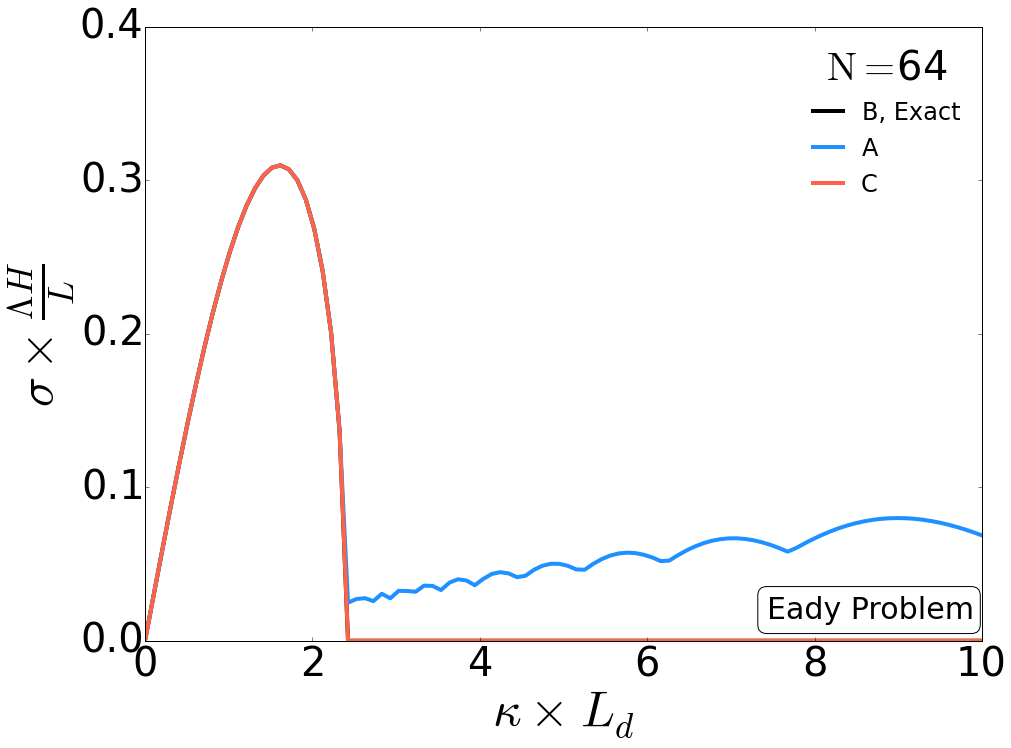

In [7]:
for i in range(Nmodes.size):
    fig=plt.figure(figsize=(15,11))
    plt_exact('sig')
    plt.plot(eadyA['kappa'],eadyA['sig'][i,:],\
            color=color1,linewidth=lw,label='A')
    plt.plot(eadyC['kappa'],eadyC['sig'][i,:],\
            color=color2,linewidth=lw,label='C')

    labels() 
    plt.yticks(np.arange(0.,.5,.1))
    plt.tick_params(axis='both', which='major', labelsize=40)    
    plt.legend(loc=1, title = r'$\mathrm{N} = $' + str(Nmodes[i]))
    plt.ylim(0.,0.4)
    plt.xlim(0,10)
    plt.text(8.65, .02, "Eady Problem", size=30, rotation=0.,\
            ha="center", va="center",\
            bbox = dict(boxstyle="round",ec='k',fc='w'))

    figtit = 'figs/eady_sig_galerk_ABC_'+str(Nmodes[i])+'.eps'
    plt.savefig(figtit,format='eps') 
    
    # close some of the figures
    if i%2:
        plt.close()


We may also be interested in computing the relative error, e.g. at the most unstable mode

In [20]:
def absolute_error(exact,approx):
    ''' compute relative error '''
    return np.abs(exact-approx)
#relative_error(exact,approx)
def find_nearest(x, x0):
    "find closest to x0 in array value"
    idx = np.abs(x - x0).argmin()
    return x[idx],idx

In [21]:
# the fasted growing mode
imax = eady_exact['sig'].argmax()

# calculate error at some wanumbers
kappas = np.array([.5,kappa[imax],4.,8.])
inds = np.zeros(kappas.size)

for i in range(kappas.size):
    kappas[i],inds[i] = find_nearest(kappa, kappas[i])

In [22]:
errorA = np.zeros((Nmodes.size,kappas.size))
errorC = np.zeros((Nmodes.size,kappas.size))

for n in range(Nmodes.size):
    for k in range(inds.size):
        errorA[n,k] = absolute_error(eady_exact['sig'][inds[k]],\
                                     eadyA['sig'][n,inds[k]])     
        errorC[n,k] = absolute_error(eady_exact['sig'][inds[k]],\
                                     eadyC['sig'][n,inds[k]])

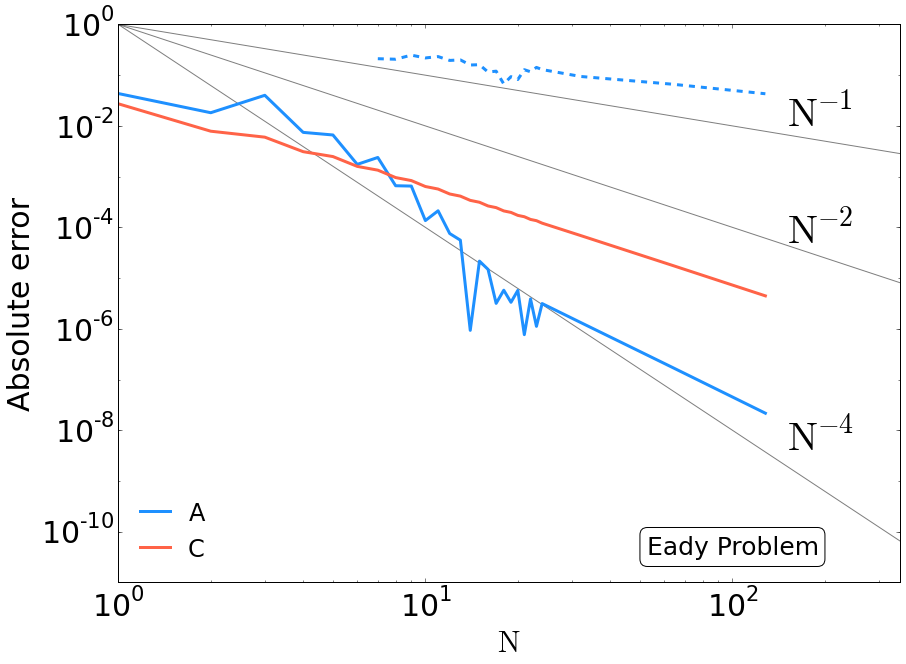

In [24]:
ns = np.array([1,500.])
lw = 3.

plt.figure(figsize=(14,10))

plt.loglog(ns,1/ns**2,'k',alpha=.5)
plt.loglog(ns,1/ns**1,'k',alpha=.5)
plt.loglog(ns,1/ns**4,'k',alpha=.5)

# solid line error at k ~2 (max growth rate)
plt.loglog(Nmodes,errorA[:,1],color=color1,label='A',linewidth=lw)
plt.loglog(Nmodes,errorC[:,1],color=color2,label='C',linewidth=lw)
# dashed line error at k ~8 (max growth rate)
plt.loglog(Nmodes,errorA[:,-1],'--',color=color1,linewidth=lw)
plt.loglog(Nmodes,errorC[:,-1],'--',color=color2,linewidth=lw)
plt.legend(loc=3)
plt.yticks(np.array([1.e-10,1.e-8,1.e-6,1.e-4,1.e-2,1.e0]))
plt.tick_params(axis='both', which='major', labelsize=30)    
plt.text(150,4.e-9,r'$\mathrm{N}^{-4}$')
plt.text(150,5.e-5,r'$\mathrm{N}^{-2}$')
plt.text(150,1.e-2,r'$\mathrm{N}^{-1}$')
plt.xlabel(r"$\mathrm{N}$",fontsize=30)
plt.ylabel(r"Absolute error",fontsize=30)
plt.xlim(0,350)
plt.text(100, .5e-10, r"Eady Problem", size=25, rotation=0.,\
                ha="center", va="center",\
                bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.savefig('figs/Error_eady.eps',format='eps')

### Plot eady growth rate for approximation A with extended $\kappa$
see the bogus critical high-wavenumber instabilities in approximation A

In [ ]:
eady30 = np.load('outputs/eady_A_30.npz')
plt.figure(figsize=(10,8))
plt.plot(eady30['kappa'],eady30['sig'][-1,:])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$k\,c_i$')
plt.savefig('figs/eady_stability_A_ext_kappa')